# Sea ice reference

## Objective

The objective of this notebook is to display the sea ice observations which will be used as the reference, to allow comparison with model outputs.

In [1]:
from watermark import watermark
%load_ext watermark
print(watermark())

Last updated: 2025-07-25T10:33:00.756129+00:00

Python implementation: CPython
Python version       : 3.12.8
IPython version      : 8.17.2

Compiler    : GCC 13.3.0
OS          : Linux
Release     : 6.8.0-63-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit



In [2]:
import sys
import os

# Chemin absolu vers le dossier codes_ORL_evaluation
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Ajout du chemin au sys.path
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print("Projet root ajouté au path:", project_root)

Projet root ajouté au path: /home/jovyan/M2_SeaIce_project


In [3]:
from module import *

/srv/conda/envs/notebook/lib/python3.12/site-packages/esmpy/interface/loadESMF.py:94: VersionWarning: ESMF installation version 8.8.0, ESMPy version 8.8.0b0
  warnings.warn("ESMF installation version {}, ESMPy version {}".format(


In [4]:
%watermark --iversions

watermark : 2.5.0
xesmf     : 0.8.8
seaborn   : 0.13.2
cdo       : 1.6.1
csv       : 1.0
sys       : 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:24:40) [GCC 13.3.0]
skimage   : 0.25.0
numpy     : 2.0.2
cartopy   : 0.24.0
matplotlib: 3.10.0
pandas    : 2.2.3
netCDF4   : 1.7.2
xarray    : 2025.1.1



## Sea ice reference

In [5]:
# path and file
path = "/home/jovyan/M2_SeaIce_project/Data/input_data/siconc_input_merged.nc"
sea_ice_ref = xr.open_dataset(path)

In [6]:
print(sea_ice_ref)

<xarray.Dataset> Size: 62MB
Dimensions:    (time: 240, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) datetime64[ns] 2kB 1995-01-31T12:00:00 ... 2014-12-31T1...
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 4kB ...
    sicbcs     (time, lat, lon) float32 62MB ...
Attributes: (12/32)
    CDI:                     Climate Data Interface version 1.9.10 (https://m...
    Conventions:             CF-1.6
    source:                  HadISST2.2.0.0 realisation 0 derived from pentad...
    institution:             Met Office Hadley Centre, Fitzroy Road, Exeter, ...
    history:                 Wed Jul 16 11:47:13 2025: cdo mergetime siconc_i...
    activity_id:             input4MIPs
    ...                      ...
    title:                   HadISST2.2.0.0-r0-0.25x0.

### Calcul de l'areacella

In [7]:
file_pattern = path
output_dir = "/home/jovyan/M2_SeaIce_project/Data/input_data"
gridarea_output = os.path.join(output_dir, f"gridarea_seaice_ref.nc")

cdo_command = f"cdo gridarea {file_pattern} {gridarea_output}"
print(f"Execution de la commande : {cdo_command}")
os.system(cdo_command)

Execution de la commande : cdo gridarea /home/jovyan/M2_SeaIce_project/Data/input_data/siconc_input_merged.nc /home/jovyan/M2_SeaIce_project/Data/input_data/gridarea_seaice_ref.nc
cdf_create        : ncid=-1  mode=4096  chunksizehint=0  file=/home/jovyan/M2_SeaIce_project/Data/input_data/gridarea_seaice_ref.nc



Error (cdf_create): /home/jovyan/M2_SeaIce_project/Data/input_data/gridarea_seaice_ref.nc: Permission denied


256

In [8]:
path_area = "/home/jovyan/M2_SeaIce_project/Data/input_data/areacella/gridarea_seaice_ref.nc"
sea_ice_area = xr.open_dataset(path_area)

In [9]:
sea_ice_area

<xarray.Dataset> Size: 523kB
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    cell_area  (lat, lon) float64 518kB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.4 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Jul 16 14:34:52 2025: cdo gridarea /home/jovyan/M2_SeaI...
    CDO:          Climate Data Operators version 2.0.4 (https://mpimet.mpg.de...

### Reference sea ice expansion by month

In [10]:
seaice_cover = sea_ice_ref["sicbcs"]

seaice_cover = seaice_cover.groupby("time.month").mean(dim="time")

In [11]:
seaice_cover

<xarray.DataArray 'sicbcs' (month: 12, lat: 180, lon: 360)> Size: 3MB
array([[[76.983795, 76.53913 , 70.80687 , ..., 67.59753 , 68.52761 ,
         71.21211 ],
        [76.983795, 76.53913 , 70.80687 , ..., 67.59753 , 68.52761 ,
         71.21211 ],
        [76.983795, 76.53913 , 70.80687 , ..., 67.59753 , 68.52761 ,
         71.21211 ],
        ...,
        [99.4679  , 99.4626  , 99.45799 , ..., 99.48885 , 99.4816  ,
         99.47445 ],
        [99.64885 , 99.64729 , 99.64567 , ..., 99.65325 , 99.65177 ,
         99.65033 ],
        [99.713875, 99.71289 , 99.71187 , ..., 99.716446, 99.7156  ,
         99.71476 ]],

       [[56.653057, 57.717285, 51.29206 , ..., 56.25469 , 54.308514,
         51.513542],
        [56.653057, 57.717285, 51.29206 , ..., 56.25469 , 54.308514,
         51.513542],
        [56.653057, 57.717285, 51.29206 , ..., 56.25469 , 54.308514,
         51.513542],
...
        [99.37507 , 99.364136, 99.352745, ..., 99.40285 , 99.39448 ,
         99.3851  ],
        [99.45027 , 99.44518 , 99.439995, ..., 99.46455 , 99.45982 ,
         99.45512 ],
        [99.512146, 99.50918 , 99.506096, ..., 99.52029 , 99.51759 ,
         99.51492 ]],

       [[90.70772 , 90.13725 , 87.82631 , ..., 76.86626 , 78.941   ,
         85.57681 ],
        [90.70772 , 90.13725 , 87.82631 , ..., 76.86626 , 78.941   ,
         85.57681 ],
        [90.70772 , 90.13725 , 87.82631 , ..., 76.86626 , 78.941   ,
         85.57681 ],
        ...,
        [99.44502 , 99.43488 , 99.42476 , ..., 99.474205, 99.46484 ,
         99.455025],
        [99.5642  , 99.56099 , 99.557755, ..., 99.57369 , 99.57051 ,
         99.567375],
        [99.620865, 99.61908 , 99.61721 , ..., 99.62544 , 99.623924,
         99.62242 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    standard_name:  sea_ice_area_fraction
    long_name:      HadISST2.2.0.0 Sea Ice Concentration
    units:          %
    cell_methods:   time: lat: lon: mean

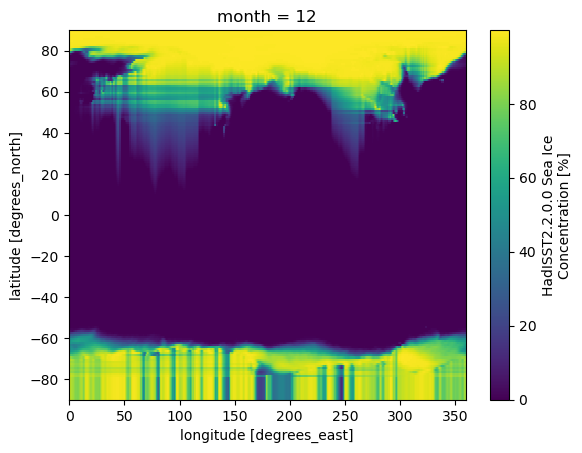

In [12]:
seaice_cover[11].plot()

In [13]:
seaice_cover.to_netcdf("/home/jovyan/M2_SeaIce_project/Data/input_data/sea_ice_ref2.nc")

### Landmask

In [14]:
# land mask path and file
path_landmask = "/home/jovyan/M2_SeaIce_project/Data/input_data/landmask/Landmask.nc"
landmask = xr.open_dataset(path_landmask)

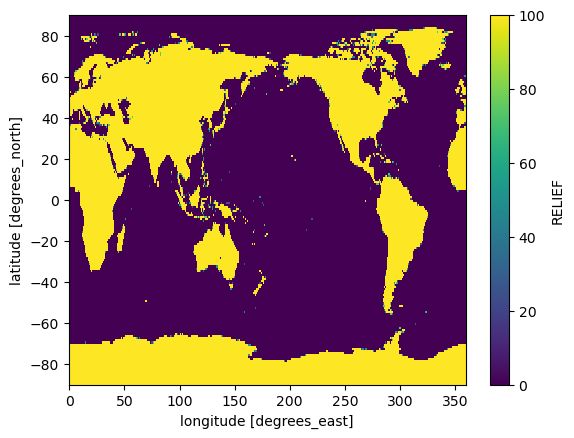

In [15]:
landmask["landfrac"].plot()

In [16]:
landmask["landfrac"]

<xarray.DataArray 'landfrac' (lat: 180, lon: 360)> Size: 518kB
[64800 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Attributes:
    long_name:  RELIEF

### Creation of the sea ice masked variable (with the landmask)

In [17]:
# 100% = terre, 0% = océan => on considère océan < 50%
ocean_mask = (landmask["landfrac"] < 50).astype(int)

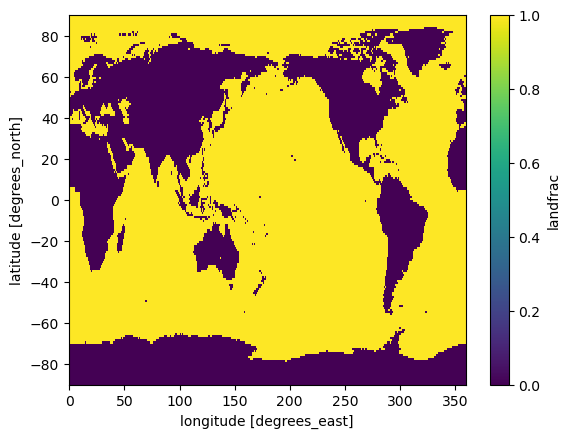

In [18]:
ocean_mask.plot()

In [19]:
seaice_cover = seaice_cover * ocean_mask

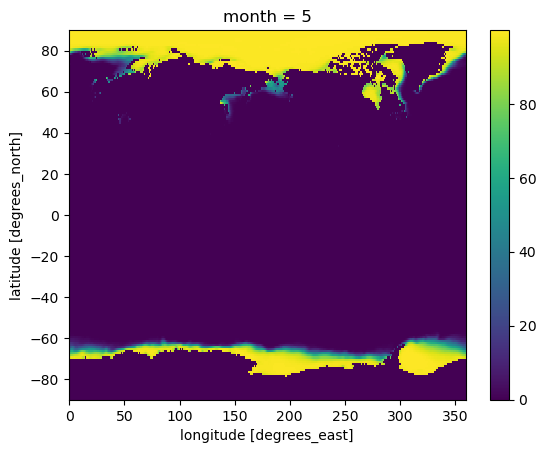

In [20]:
seaice_cover[4].plot()

In [21]:
seaice_cover

<xarray.DataArray (month: 12, lat: 180, lon: 360)> Size: 6MB
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [99.46790314, 99.46260071, 99.45799255, ..., 99.48885345,
         99.4815979 , 99.47444916],
        [99.64884949, 99.64729309, 99.64566803, ..., 99.65325165,
         99.65177155, 99.65032959],
        [99.71387482, 99.71289062, 99.71186829, ..., 99.71644592,
         99.71559906, 99.71475983]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
...
        [99.37506866, 99.36413574, 99.35274506, ..., 99.40284729,
         99.39447784, 99.38510132],
        [99.45027161, 99.4451828 , 99.43999481, ..., 99.4645462 ,
         99.45982361, 99.45511627],
        [99.512146  , 99.50917816, 99.50609589, ..., 99.52028656,
         99.51759338, 99.5149231 ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [99.44502258, 99.43488312, 99.42475891, ..., 99.47420502,
         99.46484375, 99.45502472],
        [99.56420135, 99.56098938, 99.55775452, ..., 99.57369232,
         99.57051086, 99.56737518],
        [99.62086487, 99.61907959, 99.61721039, ..., 99.6254425 ,
         99.62392426, 99.62242126]]])
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [22]:
seaice_cover.to_netcdf("/home/jovyan/M2_SeaIce_project/Data/input_data/sea_ice_ref3.nc")

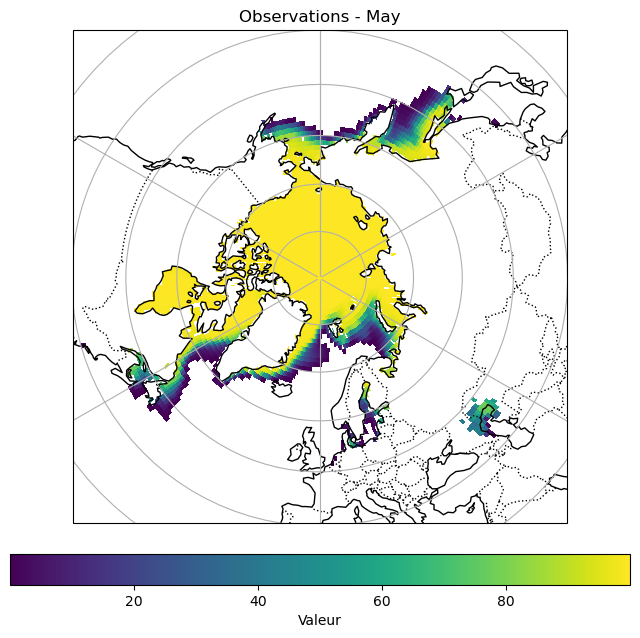

In [22]:
# Sélection du mois de mai
data_feb = seaice_cover.sel(month=2)

# Ne garder que les latitudes ≥ 20°N
data_feb_north = data_feb.sel(lat=slice(40, 90))

# Masquage des valeurs égales à 0
masked_data = data_feb_north.where(data_feb_north != 0)

# Création de la figure avec projection polaire nord
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Étendue centrée sur le pôle nord
ax.set_extent([-180, 180, 40, 90], crs=ccrs.PlateCarree())

# Colormap avec fond blanc pour les valeurs manquantes
cmap = plt.cm.viridis
cmap.set_bad(color='white')

# Tracé
mesh = ax.pcolormesh(
    masked_data['lon'], masked_data['lat'],
    masked_data,
    transform=ccrs.PlateCarree(),
    cmap=cmap
)

# Ajout des côtes, frontières et grille
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()

# Barre de couleur
plt.colorbar(mesh, orientation='horizontal', pad=0.05, label='Valeur')

# Titre
plt.title("Observations - May")

plt.show()

In [23]:
masked_data = (masked_data > 15).astype(int)

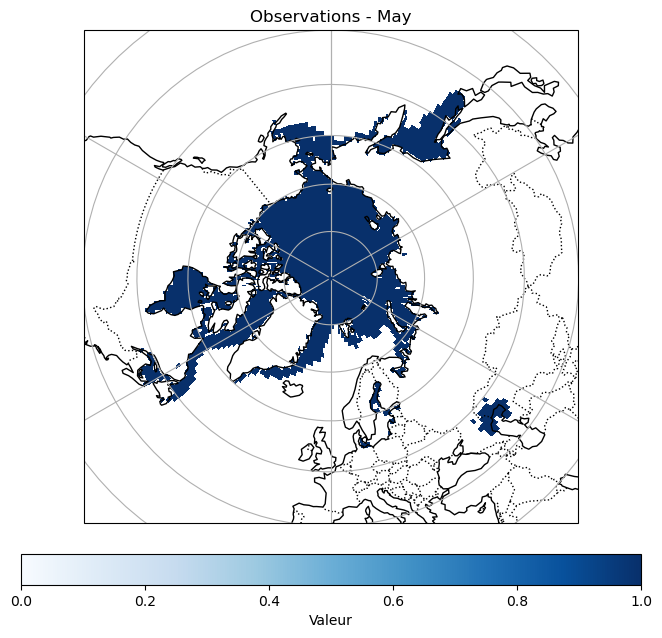

In [24]:
masked_data = masked_data.where(masked_data != 0)
masked_data = masked_data.where((masked_data < 0) | (masked_data >= 1))

# Création de la figure avec projection polaire nord
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection=ccrs.NorthPolarStereo())

# Étendue centrée sur le pôle nord
ax.set_extent([-180, 180, 40, 90], crs=ccrs.PlateCarree())

# Colormap avec fond blanc pour les valeurs manquantes
cmap = plt.cm.Blues
cmap.set_bad(color='white')

# Tracé
mesh = ax.pcolormesh(
    masked_data['lon'], masked_data['lat'],
    masked_data,
    transform=ccrs.PlateCarree(),
    cmap=cmap,
    vmin=0.0,
    vmax=1.0
)

# Ajout des côtes, frontières et grille
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()

# Barre de couleur
plt.colorbar(mesh, orientation='horizontal', pad=0.05, label='Valeur')

# Titre
plt.title("Observations - May")

plt.show()

In [25]:
# save in netCDF format
seaice_cover.to_netcdf("/home/jovyan/M2_SeaIce_project/Data/input_data/sea_ice_cover.nc")

### Areacella

In [26]:
# path and file 
path_areacella = "/home/jovyan/M2_SeaIce_project/Data/input_data/areacella/gridarea_seaice_ref.nc"
areacella = xr.open_dataset(path_areacella)

In [27]:
# select the cell_area variable
areacella = areacella["cell_area"]

### Compute the sea ice extent (car je passe en binaire)

In [28]:
seaice_cover_nh = (seaice_cover > 15).astype(int)

In [29]:
seaice_cover_nh = seaice_cover_nh.sel(lat=seaice_cover_nh.lat >= 20)

In [30]:
seaice_cover_km2_nh = seaice_surface_calculation(seaice_cover_nh, areacella)
seaice_cover_km2_nh

<xarray.DataArray (month: 12)> Size: 96B
array([14735404.05653074, 15633530.48923884, 15891210.76005795,
       14984313.64542002, 13648460.88874055, 12083078.30437279,
       10602611.3847339 ,  8531651.02719152,  7573693.21616463,
        9194412.27093241, 11098435.40545183, 12995679.00734808])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [30]:
seaice_cover_km2_nh.to_netcdf("/home/jovyan/M2_SeaIce_project/Data/input_data/seaice_extent_km2_nh.nc")

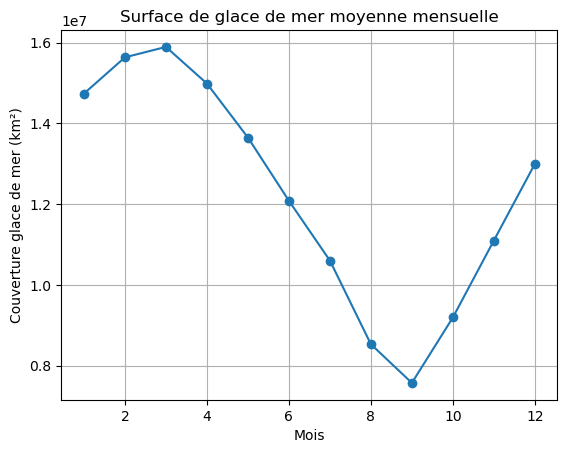

In [31]:
plot_surface_km2(seaice_cover_km2_nh)

### Compute the sea ice area (je garde tous les pourcentages)

In [32]:
# sea ice cover in fraction
seaice_area = seaice_cover / 100

#### Northern Hemisphere

In [33]:
# block the analysis at 20°N
seaice_area_nh = seaice_area.sel(lat=seaice_area.lat >= 20)
seaice_area_nh

<xarray.DataArray (month: 12, lat: 70, lon: 360)> Size: 2MB
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.99467903, 0.99462601, 0.99457993, ..., 0.99488853,
         0.99481598, 0.99474449],
        [0.99648849, 0.99647293, 0.99645668, ..., 0.99653252,
         0.99651772, 0.9965033 ],
        [0.99713875, 0.99712891, 0.99711868, ..., 0.99716446,
         0.99715599, 0.9971476 ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
...
        [0.99375069, 0.99364136, 0.99352745, ..., 0.99402847,
         0.99394478, 0.99385101],
        [0.99450272, 0.99445183, 0.99439995, ..., 0.99464546,
         0.99459824, 0.99455116],
        [0.99512146, 0.99509178, 0.99506096, ..., 0.99520287,
         0.99517593, 0.99514923]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.99445023, 0.99434883, 0.99424759, ..., 0.99474205,
         0.99464844, 0.99455025],
        [0.99564201, 0.99560989, 0.99557755, ..., 0.99573692,
         0.99570511, 0.99567375],
        [0.99620865, 0.9961908 , 0.9961721 , ..., 0.99625443,
         0.99623924, 0.99622421]]])
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 560B 20.5 21.5 22.5 23.5 24.5 ... 86.5 87.5 88.5 89.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [34]:
# compute the surface
seaice_area_km2 = seaice_surface_calculation(seaice_area_nh, areacella)
seaice_area_km2

<xarray.DataArray (month: 12)> Size: 96B
array([13011815.49176943, 13929991.42651802, 14078888.99907284,
       13266512.25103525, 11935755.25072992, 10207721.95172711,
        8187903.52576421,  6241084.36536266,  5481004.81397109,
        6989731.0300002 ,  9414116.15627054, 11420437.54722689])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [34]:
seaice_cover_km2.to_netcdf("/home/jovyan/M2_SeaIce_project/Data/input_data/seaice_cover_km2_nh.nc")

PermissionError: [Errno 13] Permission denied: '/home/jovyan/M2_SeaIce_project/Data/input_data/seaice_cover_km2_nh.nc'

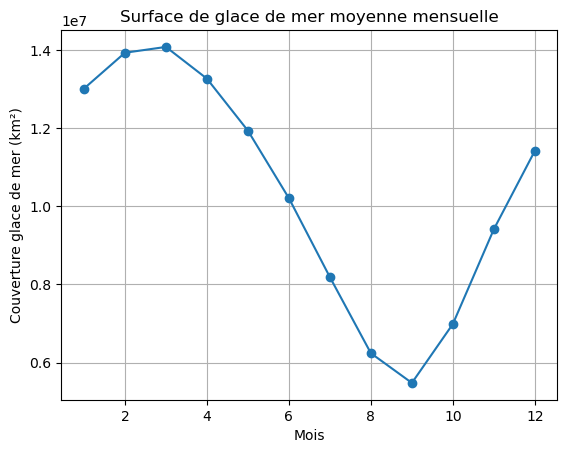

In [35]:
# plot the monthly surface
plot_surface_km2(seaice_area_km2)

#### Southern Hemisphere (SH)

##### Compute the sea ice area

In [36]:
seaice_area_sh = seaice_cover / 100

In [37]:
# block the analysis at -40°N (to only have SH)
seaice_area_sh = seaice_area_sh.sel(lat=seaice_area_sh.lat <= -40)
seaice_area_sh

<xarray.DataArray (month: 12, lat: 50, lon: 360)> Size: 2MB
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * lon      (lon) float64 3kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat      (lat) float64 400B -89.5 -88.5 -87.5 -86.5 ... -42.5 -41.5 -40.5
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [38]:
# compute the surface
seaice_area_km2_sh = seaice_surface_calculation(seaice_area_sh, areacella)
seaice_area_km2_sh

<xarray.DataArray (month: 12)> Size: 96B
array([ 5525305.65649408,  3428697.36288375,  4184371.91343153,
        6687440.42711521,  9742132.63081547, 12708657.00534025,
       15170737.20714944, 16891975.42830332, 17601797.51516075,
       17226589.30187377, 14841901.67809788, 10389965.25715676])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

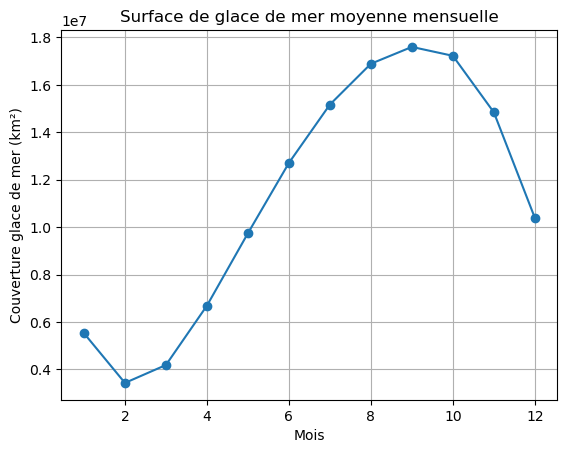

In [39]:
# plot the monthly surface
plot_surface_km2(seaice_area_km2_sh)

##### Compute the sea ice extent

In [40]:
seaice_extent_sh = (seaice_cover > 15).astype(int)

In [41]:
seaice_extent_sh = seaice_extent_sh.sel(lat=seaice_extent_sh.lat <= -40)

In [42]:
seaice_extent_km2_sh = seaice_surface_calculation(seaice_extent_sh, areacella)
seaice_extent_km2_sh

<xarray.DataArray (month: 12)> Size: 96B
array([ 9613443.02344269,  6138759.42396522,  6649940.01430568,
        9417619.51389518, 12436124.86776488, 15663503.92317315,
       18103538.49890427, 19772544.72576021, 20550070.69485911,
       20421823.88407701, 18810893.30461115, 15688327.92682287])
Coordinates:
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12

In [44]:
seaice_extent_km2_sh.to_netcdf("/home/jovyan/M2_SeaIce_project/Data/input_data/seaice_extent_km2_sh.nc")

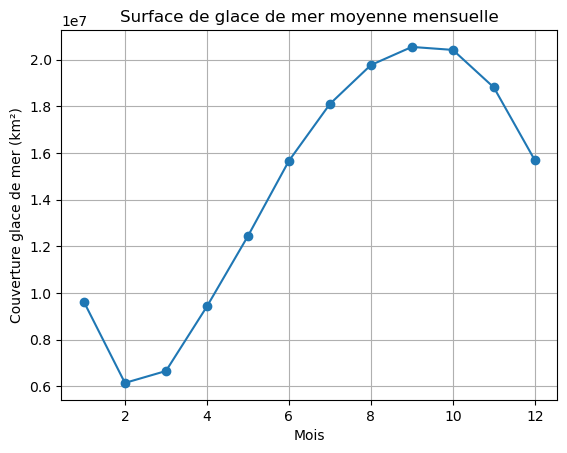

In [43]:
# plot the monthly surface
plot_surface_km2(seaice_extent_km2_sh)